<IPython.core.display.Javascript object>


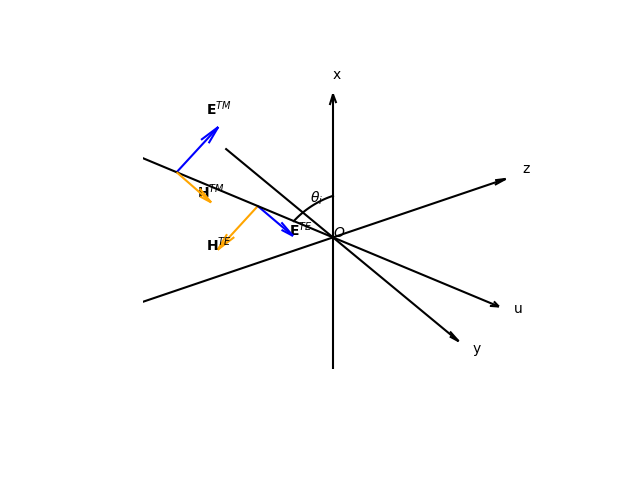

In [1]:
%matplotlib nbagg

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D


# 入射角[度]
theta_i_deg = 45

# 入射角の単位をラジアンに変換する
theta_i = theta_i_deg * np.pi / 180.0

# プロットの準備
fig = plt.figure()
ax = fig.gca(projection='3d')

# 座標軸を表示する範囲
xmin = ymin = zmin = -1
xmax = ymax = zmax = 1

#
# 座標軸をquiverの矢印で描くための設定
#

# 矢印の始点の座標
x = np.array([xmin, 0, 0, xmin])
y = np.array([0, ymin, 0, 0])
z = np.array([0, 0, zmin, -xmin/np.tan(theta_i)])

# 矢印を表すベクトルの成分
u = np.array([xmax, 0, 0, xmax]) - x
v = np.array([0, ymax, 0, 0]) - y
w = np.array([0, 0, zmax, -xmax/np.tan(theta_i)]) - z

# 矢印の長さ
l = np.sqrt((u-x)**2 + (v-y)**2 + (w-z)**2)

# 矢印につけるラベル
# 座標軸のとりかたを教科書に合わせるために以下のようにラベルをつける
# プログラム内部でx, y, zはmatplotlibの座標軸と一致させている
s = ['z', 'y', 'x', 'u']

# 座標軸の矢印の矢の長さ
arrow_length = 0.1

for i in range(len(x)):
    ax.quiver(x[i], y[i], z[i], u[i], v[i], w[i],
              pivot = 'tail', length = 1,
              arrow_length_ratio = arrow_length/l[i], color = 'k')
    # 軸のラベルを表示する
    # 係数1.1は表示位置を調整するためだけのパラメータで
    # 特に意味はない（これ以降も同様）
    ax.text((u[i]+x[i])*1.1, (v[i]+y[i])*1.1, (w[i]+z[i])*1.1, s[i])



# このプログラムのから，x, y, z, u, v, wは使い捨てで問題ないので，
# これ以降，x, y, z, u, v, wは上書きして使用する
# また，x, y, z, u, v, wはquiverのドキュメントと同じ意味で使用する


# TE, TMモードに対する電界・磁界ベクトルを描く
# 電界・磁界ベクトルの向きの関係を示すことが目的なので，
# ベクトルの長さに意味はない

# 電界・磁界ベクトルの長さ
lv = 0.3

# TEモードの場合

# ベクトルを描く始点の座標
x = -0.4
y = 0
z = -x/np.tan(theta_i)

# 電界ベクトルの成分
u = 0
v = lv
w = 0
ax.quiver(x, y, z, u, v, w,
          pivot = 'tail', arrow_length_ratio = arrow_length/lv,
          color = 'b')
ax.text((x+u)*1.1, (y+v)*1.1, (z+w)*1.1, '$\mathbf{E}^{TE}$')

# 磁界ベクトルの成分
u = -lv * np.cos(theta_i)
v = 0
w = -lv * np.sin(theta_i)
ax.quiver(x, y, z, u, v, w,
          pivot = 'tail', arrow_length_ratio = arrow_length/lv,
          color = 'orange')
ax.text((x+u)*1.1, (y+v)*1.1, (z+w)*1.1, '$\mathbf{H}^{TE}$')


# TMモードの場合

# ベクトルを描く始点の座標
x = -0.8
y = 0
z = -x/np.tan(theta_i)

# 電界ベクトルの成分
u = lv * np.cos(theta_i)
v = 0
w = lv * np.sin(theta_i)
ax.quiver(x, y, z, u, v, w,
          pivot = 'tail', arrow_length_ratio = arrow_length/0.3,
          color = 'b')
ax.text((x+u)*1.1, (y+v)*1.1, (z+w)*1.1, '$\mathbf{E}^{TM}$')

# 磁界ベクトルの成分
u = 0
v = lv
w = 0
ax.quiver(x, y, z, u, v, w,
          pivot = 'tail', arrow_length_ratio = arrow_length/lv,
          color = 'orange')
ax.text((x+u)*1.1, (y+v)*1.1, (z+w)*1.1, '$\mathbf{H}^{TM}$')


# 原点Oを表示
ax.text(0, 0, 0, '$O$')

# 入射角を表す円弧の描画
t = np.linspace(np.pi/2, np.pi/2 + theta_i, 20)
r = 0.3
x = r * np.cos(t)
y = np.zeros(len(x))
z = r * np.sin(t)
ax.plot(x, y, z, 'k')

x = r*1.1 * np.cos(np.pi/2 + theta_i/2)
y = 0
z = r*1.1 * np.sin(np.pi/2 + theta_i/2)
ax.text(x, y, z, r'$\theta_i$')


ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))
ax.invert_yaxis()
ax.set_zlim((zmin, zmax))
            
plt.axis('off')
plt.show()